<a href="https://colab.research.google.com/github/atharvaingale19/trendteller/blob/main/Untitled88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 1. Reading the dataset (with the comma fix!)
# thousands=',' tells pandas to treat '25,000' as the number 25000
data = pd.read_csv('datasets.csv', thousands=',')

df = pd.DataFrame(data)

# 2. Preparing the Model
X = df[['follower_count', 'sentiment_score', 'account_age_days']] # Features
y = df['is_viral'] # Target

# 3. Training the Logistic Regression Model for utmost accuracy
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X, y)

# 4. Explaining the "Mechanics" (Feature Weights)
# Logistic Regression uses coefficients to show how much weight each variable carries
importances = model.coef_[0]
print("--- MODEL ANALYSIS: WHAT CAUSES VIRALITY? ---")
for feature, importance in zip(X.columns, importances):
    print(f"- {feature}: {importance:.4f} weight in prediction")

# 5. Testing it on a brand new, fake tweet
new_tweet = pd.DataFrame({'follower_count': [5000], 'sentiment_score': [80], 'account_age_days': [500]})
prediction = model.predict(new_tweet)

print("\n--- LIVE PREDICTION ---")
print(f"New Tweet Variables: 5000 followers, 80 sentiment, 500 days old.")
print("Prediction: Viral" if prediction[0] == 1 else "Prediction: Not Viral")

--- MODEL ANALYSIS: WHAT CAUSES VIRALITY? ---
- follower_count: 0.0018 weight in prediction
- sentiment_score: -0.0000 weight in prediction
- account_age_days: 0.0001 weight in prediction

--- LIVE PREDICTION ---
New Tweet Variables: 5000 followers, 80 sentiment, 500 days old.
Prediction: Not Viral


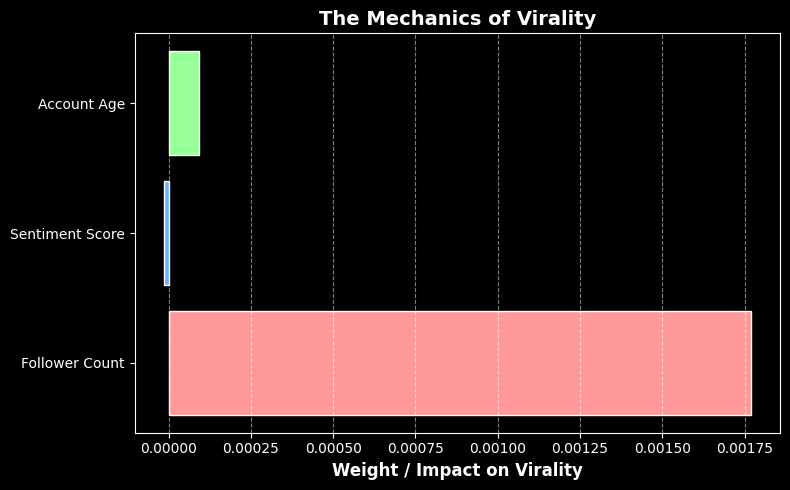

In [10]:
import matplotlib.pyplot as plt

# 1. Grab the feature names and their impact weights from your model
features = ['Follower Count', 'Sentiment Score', 'Account Age']
weights = model.coef_[0] # These are the mathematical weights from Logistic Regression

# 2. Set up a cool, professional-looking plot
plt.figure(figsize=(8, 5))
plt.style.use('dark_background') # Makes it look like a hacker/pro dashboard. (Change to 'ggplot' if you want a white background)

# 3. Create a horizontal bar chart
colors = ['#ff9999', '#66b3ff', '#99ff99']
bars = plt.barh(features, weights, color=colors, edgecolor='white')

# 4. Add labels and title
plt.xlabel('Weight / Impact on Virality', fontsize=12, fontweight='bold')
plt.title('The Mechanics of Virality', fontsize=14, fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.5)

# 5. Show the magic
plt.tight_layout()
plt.show()